In [ ]:
#data science:
#step 1: data preprocessing - identifying the data types in the dataset
#step 2:dataset exploration- fetch and display our dataset in table format
#step 3: data cleaning - removing null cells
#step 4: data anlysis- we use describe(),groupby() etc to anlyse data
#step 5: EDA or Clustering or regression etc
#step 6: make descision according to our data analysis

In [1]:
import pandas
import sklearn
import matplotlib
import seaborn

In [2]:
#step 2:dataset exploration- fetch and display our dataset in table format
customers=pandas.read_csv(r"C:\Users\Sarah\Desktop\modcom\class\kindi-sarah\data science\data\Mall_Customers.csv")
customers

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0
...,...,...,...,...,...
195,196,Female,35,120.0,79.0
196,197,Female,45,126.0,NaN
197,198,Male,32,126.0,74.0
198,199,Male,32,137.0,18.0


In [3]:
#step 3: data cleaning - removing null cells
customers.isnull().sum()

CustomerID        0
Gender            4
Age               0
Annual Income     1
Spending Score    3
dtype: int64

In [5]:
#replacing empty cells in column Spending Score with the mean of spending score
mean_spend=customers["Spending Score"].mean()
mean_spend
customers["Spending Score"].fillna(mean_spend,inplace=True) 
customers.isnull().sum()

C:\Users\Sarah\AppData\Local\Temp\ipykernel_11092\4213069235.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers["Spending Score"].fillna(mean_spend,inplace=True)


CustomerID        0
Gender            4
Age               0
Annual Income     1
Spending Score    0
dtype: int64

In [8]:
#replace null cels in column gender with the word 'unknown'
#replace null cells in colunmn Annual Income with its mean
customers.dropna(inplace=True) #dropna() deletes all null columns
customers.isnull().sum()


CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [9]:
#step 4: data anlysis- we use describe(),groupby() etc to anlyse data
#lets decribe our numerical datatypes
customers.describe()

,CustomerID,Age,Annual Income,Spending Score
count,195.000000,195.000000,195.000000,195.000000
mean,99.435897,38.866667,60.107692,50.415254
std,57.805573,13.968029,26.252417,25.610554
min,1.000000,18.000000,15.000000,1.000000
25%,49.500000,29.000000,40.000000,35.000000
50%,99.000000,36.000000,61.000000,50.000000
75%,148.500000,49.000000,77.500000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
#step 5: Clustering(we will be training models and not testing, bcs clustering is an unsupervised ml)
#we are using K-Means algrithm
#we need to split our dataset so as to remove column CustomerID and Gender
array=customers.values
array
X=array[0:200,2:5] 
X

array([[19, 15.0, 39.0],
       [21, 15.0, 81.0],
       [20, 16.0, 6.0],
       [23, 16.0, 77.0],
       [31, 17.0, 40.0],
       [22, 17.0, 76.0],
       [35, 18.0, 6.0],
       [23, 18.0, 94.0],
       [64, 19.0, 3.0],
       [30, 19.0, 72.0],
       [67, 19.0, 14.0],
       [35, 19.0, 99.0],
       [58, 20.0, 15.0],
       [24, 20.0, 77.0],
       [37, 20.0, 13.0],
       [22, 20.0, 79.0],
       [35, 21.0, 35.0],
       [20, 21.0, 66.0],
       [52, 23.0, 29.0],
       [35, 23.0, 98.0],
       [35, 24.0, 35.0],
       [25, 24.0, 73.0],
       [46, 25.0, 5.0],
       [31, 25.0, 73.0],
       [54, 28.0, 14.0],
       [29, 28.0, 82.0],
       [45, 28.0, 32.0],
       [35, 28.0, 61.0],
       [40, 29.0, 31.0],
       [23, 29.0, 87.0],
       [60, 30.0, 4.0],
       [21, 30.0, 73.0],
       [53, 33.0, 4.0],
       [18, 33.0, 92.0],
       [49, 33.0, 14.0],
       [21, 33.0, 81.0],
       [42, 34.0, 17.0],
       [30, 34.0, 73.0],
       [36, 37.0, 26.0],
       [20, 37.0, 75.0],
      

In [12]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=12,random_state=42)
#we are creating clusters/groups(12), note that the more the groups the more accurate the algorithm. K-means creates clusters and we use parameter random_state to print random rows everytime we cluster
model.fit(X)

KMeans(n_clusters=12, random_state=42)

In [13]:
#lets view the clusters/groups
means=model.cluster_centers_
#cluster_centsers_ shows us the mean of our groups/clusters
means

array([[ 56.25581395,  53.79069767,  49.23255814],
       [ 32.82142857,  78.57142857,  81.89285714],
       [ 32.08333333,  67.58333333,  41.11040609],
       [ 25.91666667,  19.75      ,  80.41666667],
       [ 49.        ,  24.46153846,  11.07692308],
       [ 36.18181818,  29.90909091,  35.09090909],
       [ 50.30769231,  83.30769231,  19.46153846],
       [ 32.66666667, 110.66666667,  83.55555556],
       [ 32.27272727,  77.90909091,   8.63636364],
       [ 40.375     , 112.5       ,  28.83121827],
       [ 25.56      ,  53.92      ,  52.84      ],
       [ 24.5       ,  32.9       ,  78.1       ]])

In [15]:
#tabulate the array
clusters=pandas.DataFrame(means,columns=['Age','Income', 'spending Score'])
clusters

,Age,Income,spending Score
0,56.255814,53.790698,49.232558
1,32.821429,78.571429,81.892857
2,32.083333,67.583333,41.110406
3,25.916667,19.750000,80.416667
4,49.000000,24.461538,11.076923
5,36.181818,29.909091,35.090909
6,50.307692,83.307692,19.461538
7,32.666667,110.666667,83.555556
8,32.272727,77.909091,8.636364
9,40.375000,112.500000,28.831218


In [16]:
#puting custoers in their respective groups. first we'll have to create a new column for group numbers
customers["group_number"]=model.labels_
customers

,CustomerID,Gender,Age,Annual Income,Spending Score,group_number
0,1,Male,19,15.0,39.000000,5
1,2,Male,21,15.0,81.000000,3
2,3,Female,20,16.0,6.000000,4
3,4,Female,23,16.0,77.000000,3
4,5,Female,31,17.0,40.000000,5
...,...,...,...,...,...,...
195,196,Female,35,120.0,79.000000,7
196,197,Female,45,126.0,50.324873,9
197,198,Male,32,126.0,74.000000,7
198,199,Male,32,137.0,18.000000,9


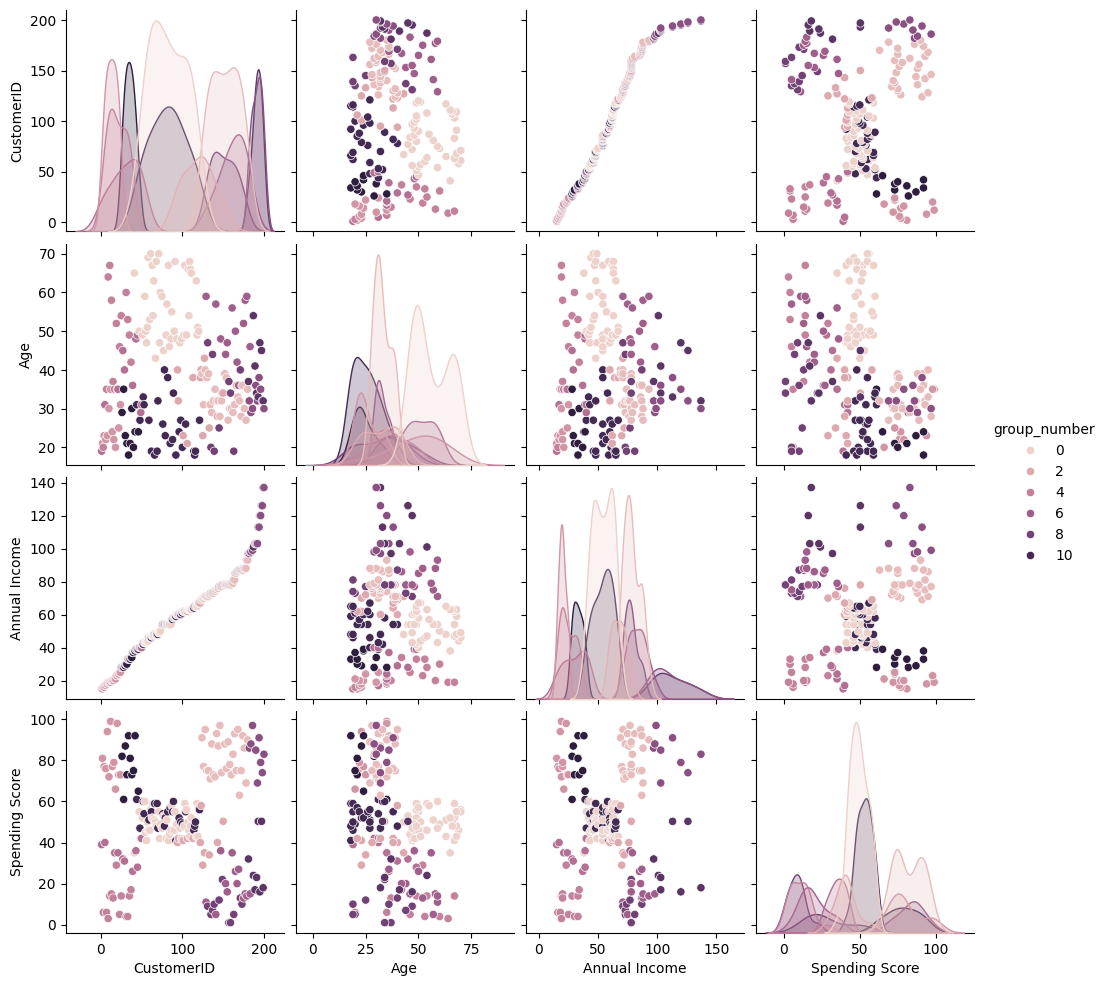

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(customers,hue='group_number') #pairplot() plots multiple pairwise bivariante distribution in dataset

<Axes: xlabel='group_number', ylabel='count'>

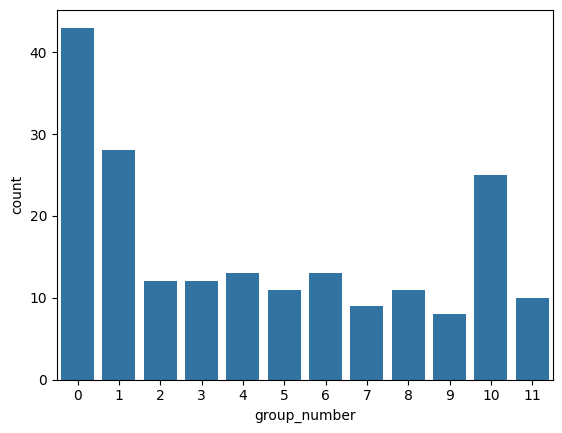

In [18]:
sns.countplot(x=customers['group_number'])
#give the a title: distribution of group members
#label y-axis: number of customers